# AE4 Recommender Challenge EDSA
#### Unsupervised_learning_AE4_DSFT21
<div style="width:100%;text-align: center;"> <img align=middle src="https://github.com/Jean-LucVanZyl/unsupervised-predict-streamlit-template/blob/fca0aedd189023bfd5537732290b66e3df797de2/Images/0f22ad161f0a604907d6447f6c88da78.png?raw=true'" alt="Heat beating" style="height:500px;margin-top:3rem;"> </div>

## Table of Contents

1. <a href ="#1.-Challenge-Description">Challenge Description</a>
2. <a href ="#2.-Evaluation-Metric">Evaluation Metric</a>
3. <a href ="#3.-Comet-Experiment">Comet Experiment</a>
4. <a href ="#4.-Importing-Libraries">Importing Libraries</a>
5. <a href ="#5.-Importing-Data">Importing Data</a>
6. <a href ="#6.-Data-Description">Data Decription</a>
7. <a href ="#7.-Exploratory-Data-Analysis"> Exploratory Data Analysis</a>
8. <a href ="#8.-Recommendation-System:-Content-Based-Filtering">Recommendation System: Content Based Filtering</a>
9. <a href ="#9.-Dimensionality-Reduction">Dimensionality Reduction</a>
10. <a href ="#10.-Collaborative-Filtering">Collaborative Filtering</a>
11. <a href ="#11.-Conclusion">Conclusion</a>
12. <a href ="#12.-Submission">Submission</a>


In [17]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
#for our kaggle notebook

## 1. Challenge Description

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging US to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

## 2. Evaluation Metric

The evaluation metric for this competition is Root Mean Square Error. Root Mean Square Error  is commonly used in regression analysis and forecasting, and measures the standard deviation of the residuals arising between predicted and actual observed values for a modelling process. For our task of generating user movie ratings via recommendation algorithms, the the formula is given by:

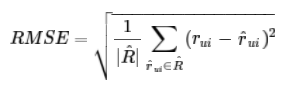
Where \\( \hat{R} \\) is the total number of recommendations generated for users and movies, with \\( r_{ui} \\) and \\( \hat{r}_{ui} \\) being the true and predicted ratings for user \\( u \\) watching movie \\( i \\) respectively.

## 3. Comet Experiment 

In [3]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="1AwUmDPCaKw7TZWLKwrSQ2n9z",
    project_name="general",
    workspace="jean-lucvanzyl",
)



COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/jean-lucvanzyl/ae4-unsupervised-notebook/24a75b5ac2464d2f8c717e1d839f5158
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (11 MB)
COMET INFO:     installed packages       : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/jean-lucvanzyl/general/07f0d35598c14b94bb5484d97faec2fa



Comet allows us to report on code, hyperparameters, metrics, dependencies, system metrics, dataset samples, models, key values and anything else that relates to a machine learning experiment.

## 4. Importing Libraries
In this notebook we shall be importing various python libraries to assist with constructing our classification model.

In [1]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from sklearn.neighbors import  NearestNeighbors
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Packages for Randomisation
import random


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


## 5. Importing Data

In [3]:
#Movies dataframe
movies_df = pd.read_csv('movies.csv')

#Genome_scores dataframe
gs_df = pd.read_csv('genome_scores.csv')

#Genome_tags dataframe
gt_df = pd.read_csv('genome_tags.csv')

#imbd dataframe
imdb_df = pd.read_csv('imdb_data.csv')

#links dataframe
links_df = pd.read_csv('links.csv')

#tags dataframe
tags_df = pd.read_csv('tags.csv')

#train dataframe
train_df = pd.read_csv('train.csv')

#test dataframe 
test_df = pd.read_csv('test.csv')

#sample submission
sample_df = pd.read_csv('sample_submission.csv')


We need to determine the rating score for the respective movieId and submit a csv file in that format for the Kaggle competition. Lets take a look at the features and shape of our training data and a quick look at our movies dataframe.

In [4]:
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [5]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
train_df.shape

(10000038, 4)

Looking at the shape of the dataframe, we find we have 4 columns and more than 10 million observations, which is going to require a fair bit of processing power to work through. The column names are User ID, Movie ID, Rating and Timestamp. All of the data to train our model upon has numerical data types, perfect for unsupervised learning. The columns aren't measured on the same scale, so lets scale the data first and afterwards apply dimensionality reduction.

In [7]:
movies_df.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


## 6. Data Description

Exploring the different supplied files:
 * 6.1) Movies ( movies_df)
 * 6.2) Genome Scores and tags (gs_df & gt_df)
 * 6.3) Imbd database of each movie (imbd_df)
 * 6.4) train and test datasets

#### 6.1 Movies datasets

Movie titles are entered manually or imported from [Moviedb](https://www.themoviedb.org/), and include the year of release in parentheses.

In [8]:
movies_df.info() # Get concise summary of the movie dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [9]:
movies_df.head() # Get the first 5 observations 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


This dataset consists of 62423 observations or rather movies and contains the extra infomation about the movies such as the titles and genres. Each line of this file after the header row represents one movie, and has the following format:
movieId,title,genres where genres are stored as pipe-separated list.

#### 6.2 Genome Scores and tags (gs_df & gt_df)

The tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews. The process is further described by [GroupLens](http://files.grouplens.org/papers/tag_genome.pdf).

In [10]:
gt_df.info() # Get concise summary of the Genome_tag Dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [11]:
gs_df.info() # Get concise summary of the Genome_score Dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


There is more than 15000000 genome scores present and there is atleast 1128 observations in the genome tags dataframe. These datasets gives us the tags and their relative score. The genome tag DataFrame consists of the tagId as well the tag which is a string.

#### 6.3 Imdb database of each movie (imdb_df)

This dataset consists of additional movie content data was legally scraped from [IMDB](https://www.imdb.com/)

In [12]:
imdb_df.info() # Get concise of imdb database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [13]:
imdb_df.head() # Shows the first 5 observations

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


 This dataset gives more infomation to about 27000+ movies present in the train dataset. The features are title_cast, director, runtime, budget as well plot_keywords. The title_cast feature describes the most famous/paid actors/actresses in the movie and runtime describes how long movie was and plot_keyword describes the most important key words of the plot

#### 6.4 Train dataset

This dataset will be used to train the model.

In [14]:
train_df.info() # Get the summary of the dataset's metadata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [15]:
train_df.isnull().sum() # check if there are any null values

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [16]:
train_df.head() # show the first 5 observations 

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


The data has more than 10000000 observations where the userId represent the users data system, moviesId represents and the rating represents the user's ratings for each movie.There are not any null values present in the train dataset. It has 3 numerical features of which two are categorical and one being continuous.

## 7. Exploratory Data Analysis

This section we are doing a further deep analysis of the data and get more insights on the data itself.

* 7.1 User Analysis
* 7.2 Rating Analysis
* 7.3 Year Analysis
* 7.4 Genre Analysis

#### 7.1 User analysis

In [17]:
print('There are ',train_df["userId"].nunique(), 'users and',train_df.movieId.nunique(),'movies in the database/dataframe')

There are  162541 users and 48213 movies in the database/dataframe


In [18]:
# Create a Dataframe consisting of the users average rating the give per user and number of times they have rated movies
train1 = pd.DataFrame(train_df.groupby('userId')['rating'].agg('mean').reset_index())
train1_2 = pd.DataFrame(train_df.groupby('userId')['rating'].count().reset_index())
# Merge the above to dataframe 
train1 = train1.merge(train1_2,on='userId',how = 'left')
# Rename the columns respectively
train1.rename(columns={'rating_x':'avg_rating','rating_y':'number_of_movies'},inplace = True)

# Sort the data in descending of the number of movies the user has rated
train1 = train1.sort_values('number_of_movies', ascending = False)

# Show 5 observations 
train1.head()

,userId,avg_rating,number_of_movies
72314,72315,3.092380,12952
80973,80974,3.277582,3680
137292,137293,3.192168,3588
33843,33844,2.583853,3208
20054,20055,3.179016,3050


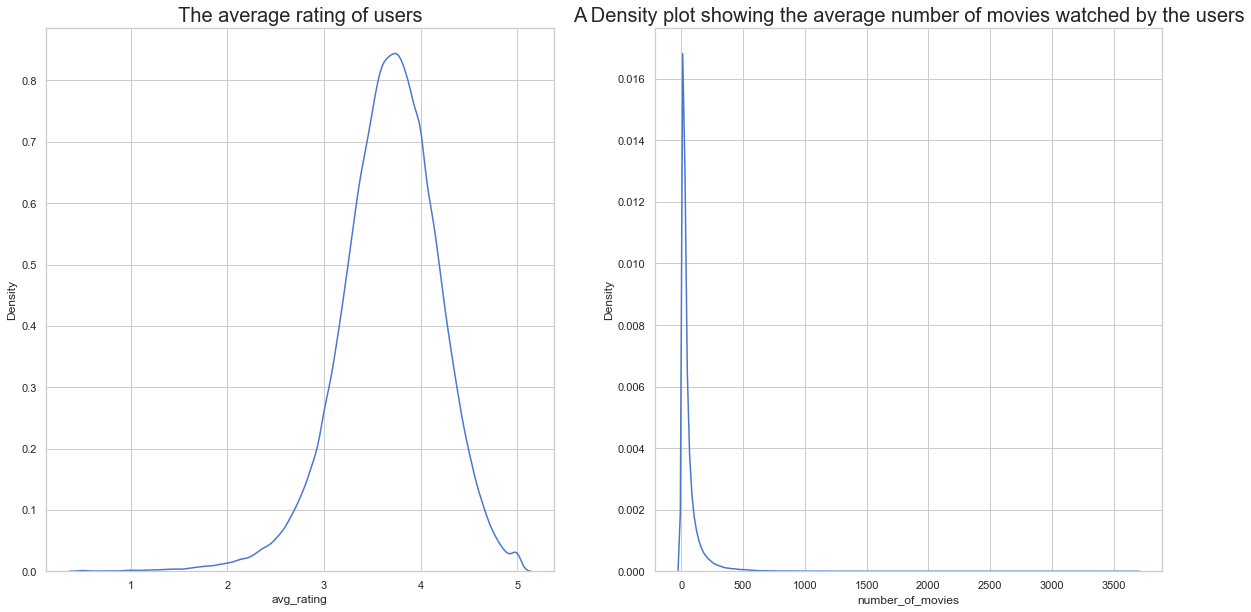

In [19]:
# Initialize the plot with set figure size
fig, ax = plt.subplots(1,2,figsize=(20, 10)) 

# Create a densityplot to visualise the density of the ratings per users
sns.kdeplot(ax=ax[0], x='avg_rating', data=train1) 
ax[0].set_title("The average rating of users",fontsize = 20)

# Set the tick labels to appear in non-scientific form
plt.ticklabel_format(style='plain', axis='y', useOffset=False) 

# Create a KDE plot of the rating the users 
sns.kdeplot(ax=ax[1], x='number_of_movies', data=train1[1:]) 
ax[1].set_title("A Density plot showing the average number of movies watched by the users",fontsize = 20)
    
# Show density plot
plt.show()

The density plots explain the general trend or behaivior of the users. Two features that were observed displayed that most users(80%) give an average rating of 3.5 for a movie that the user has watched. 

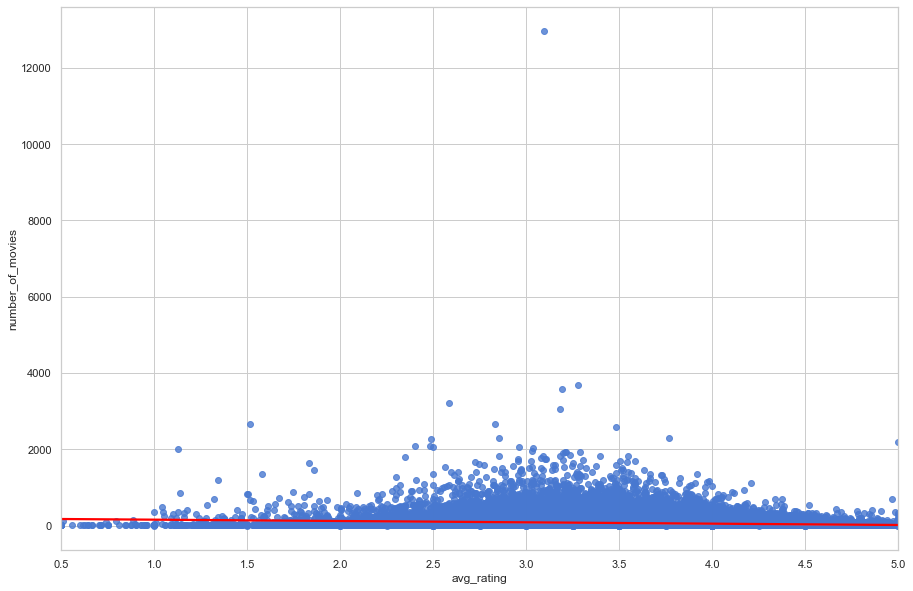

In [20]:
# Check for correlation between average rating and the number of the times have the user has watch a movie

# Create a scatter plot to visualise 
sns.regplot(data = train1, y = "number_of_movies", x = "avg_rating",line_kws={"color": "red"})

# Show the scatterplot
plt.show()

The relationship between average rating and number of movies is observed from above linear dependent. When the user has watched more movies tend give a higher rating.

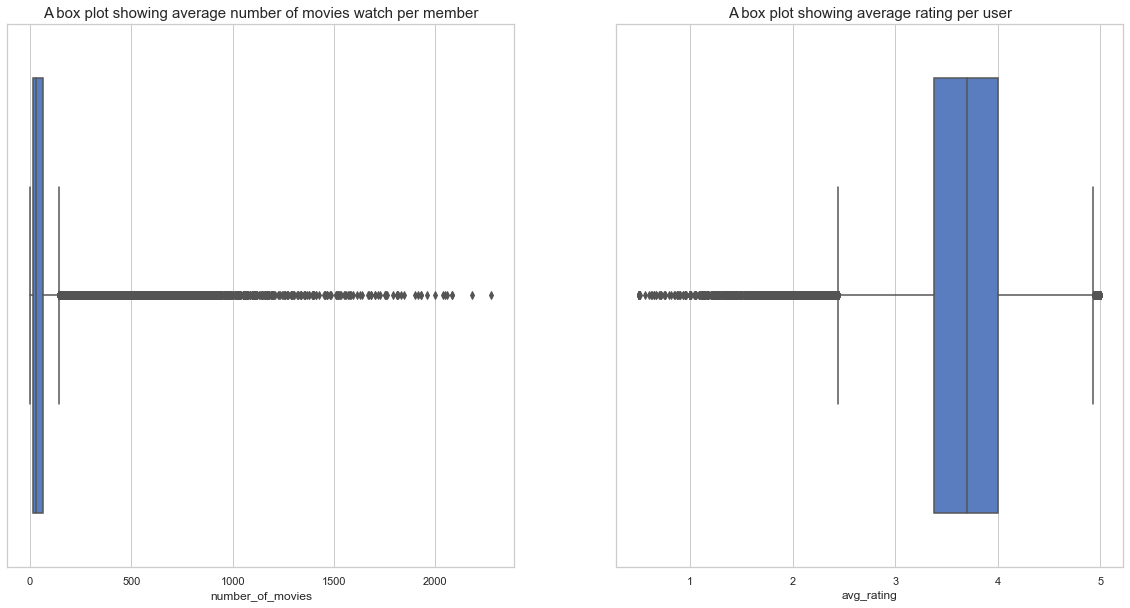

In [21]:
fig,ax = plt.subplots(1,2,figsize = (20,10))


sns.boxplot(ax =ax[0],x = train1.iloc[10:,2])

ax[0].set_title("A box plot showing average number of movies watch per member", fontsize = 15)
sns.boxplot(ax = ax[1],x = train1.iloc[10:,1] )

ax[1].set_title("A box plot showing average rating per user", fontsize = 15)
plt.show()

What is observed from all the plots is that mosts users have watched less than 500 movies and that most users gave average rating of 3.5 for all the movies they have watched. There is also a high presence of outliers in the data which might be explained in investigating other features.

#### 7.2 Ratings analysis

The train dataset gives an overview of how each user rated each movie. What was observed that each user can rate a movie from 0.5 (Worst) to 5.0 (Best). Here is the full detailed scale:
 * 0.5 - Very Bad
 * 1.0 - Bad
 * 1.5 - Moderately Bad
 * 2.0 - Not that Bad
 * 2.5 - Less than average 
 * 3.0 - Average 
 * 3.5 - Above than average 
 * 4.0 - Good
 * 4.5 - Very Good
 * 5.0 - Excellent 

In [22]:
train_df.rating.value_counts()

4.0    2652977
3.0    1959759
5.0    1445230
3.5    1270642
4.5     880516
2.0     656821
2.5     505578
1.0     311213
1.5     159731
0.5     157571
Name: rating, dtype: int64

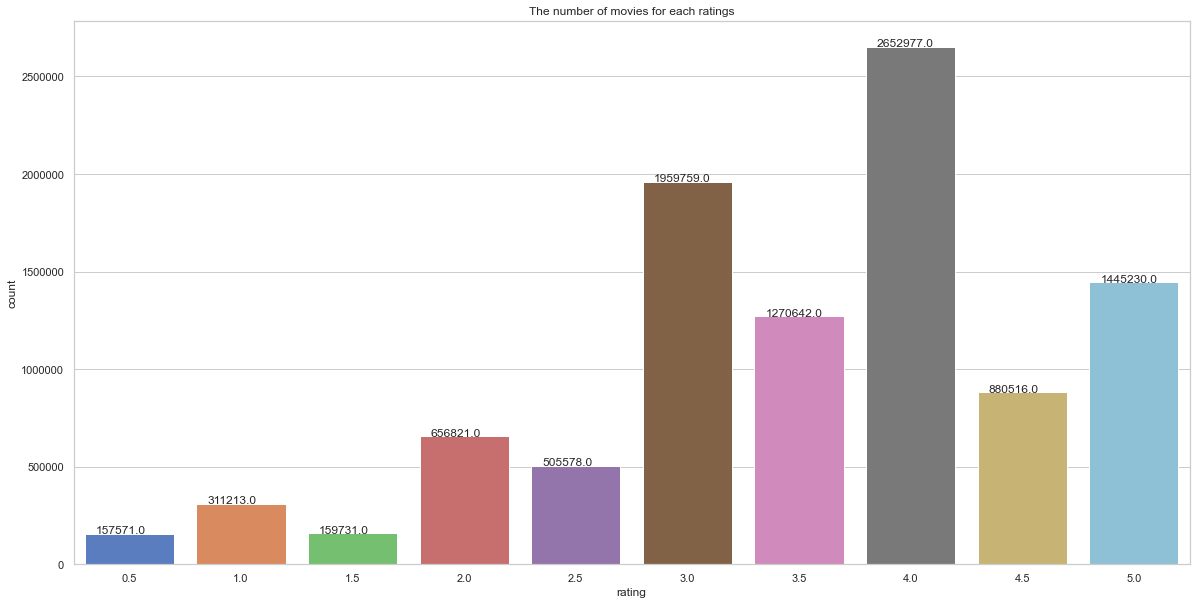

In [23]:
# Plotting the graph
fig, ax = plt.subplots(figsize=(20, 10)) # Initialize the plot with set figure size

sns.countplot(ax=ax, x='rating', data=train_df) # Create a countplot to visualise the number of movies per category
ax.set_title("The number of movies for each ratings")
plt.ticklabel_format(style='plain', axis='y', useOffset=False) # Set the tick labels to appear in non-scientific form

# Make the counts appear on the different
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    
# Show the countplot
plt.show()

From the countplot, 60579966 movies in the dataset where rated 3.0 or above where most were rated given the rating of 4.0.
Most of the movies in the data were very good considering the amount of movies that were rated 4.0 or above.
With further scrutiny of the data, the observations acquired from the above chart will be explained in the next incoming sections.  

In [24]:
train_movies = train_df.merge(movies_df,on = 'movieId') # Merges the movie and train datasets
train_movies.drop(columns=['timestamp'],inplace=True) # Dropping the timestamp column
train_movies.head(10) # Shows the first 10 observations

,userId,movieId,rating,title,genres
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
5,99887,57669,0.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
6,120194,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
7,847,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
8,47201,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
9,94499,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [25]:
# Create a new dataframe from the train_movies dataframe to get the average rating  
train2 = train_movies.copy()

# Drop any duplicated information 
train2.drop_duplicates(['title','genres'],inplace = True)

# Get the  avarage rating for each movie in the data 
total_ratings = train_movies.groupby(['movieId','genres']).mean()['rating'].reset_index()

# Merge the the train2 and the total_ratings to create a new data 
train2 = train2.merge(total_ratings, on = 'movieId')

train2.drop(columns=['userId','rating_x','genres_y'],inplace=True) # Delete the duplicated columns

train2.rename(columns={'genres_x':'genres','rating_y':'rating'},inplace=True) # Rename the columns

# Show the  first 5 observations
train2.head()

,movieId,title,genres,rating
0,57669,In Bruges (2008),Comedy|Crime|Drama|Thriller,3.889842
1,5,Father of the Bride Part II (1995),Comedy,3.059165
2,5459,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi,3.004276
3,32296,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime,2.535714
4,366,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller,2.972609


In [26]:
train3 = train2.copy() # Make a copy of the Train2 dataset
# Create a user dataset to check how many time it has been voted for
user_rated = pd.DataFrame(train_df['movieId'].value_counts().reset_index()) # Create a user dataframe using groupby function

user_rated.rename(columns = {'index':'movieId','movieId':'voted'},inplace = True) # Rename the columns 

train3 = train3.merge(user_rated, on ='movieId') # Combine the train3 dataset with the User_rated data

# Filter the data 
train3 = train3[train3['voted'] > 10] # Find the movies which have the us voted for more than 50 

train3 = train3.sort_values('rating',ascending=False) # Sort the values by the rating feature

train3.head() # Show the first 5 observations 

,movieId,title,genres,rating,voted
18499,174551,Obsession (1965),Comedy,4.772727,11
5148,171011,Planet Earth II (2016),Documentary,4.517084,439
1152,171705,Den radio (2001),(no genres listed),4.500000,13
2660,159817,Planet Earth (2006),Documentary,4.473294,674
9966,171495,Cosmos,(no genres listed),4.456897,116


The train dataset consists of movies that have more than 10 ratings where the voted represents the amount of time the users has voted for each movie. The movies that had less 10 votes will further 

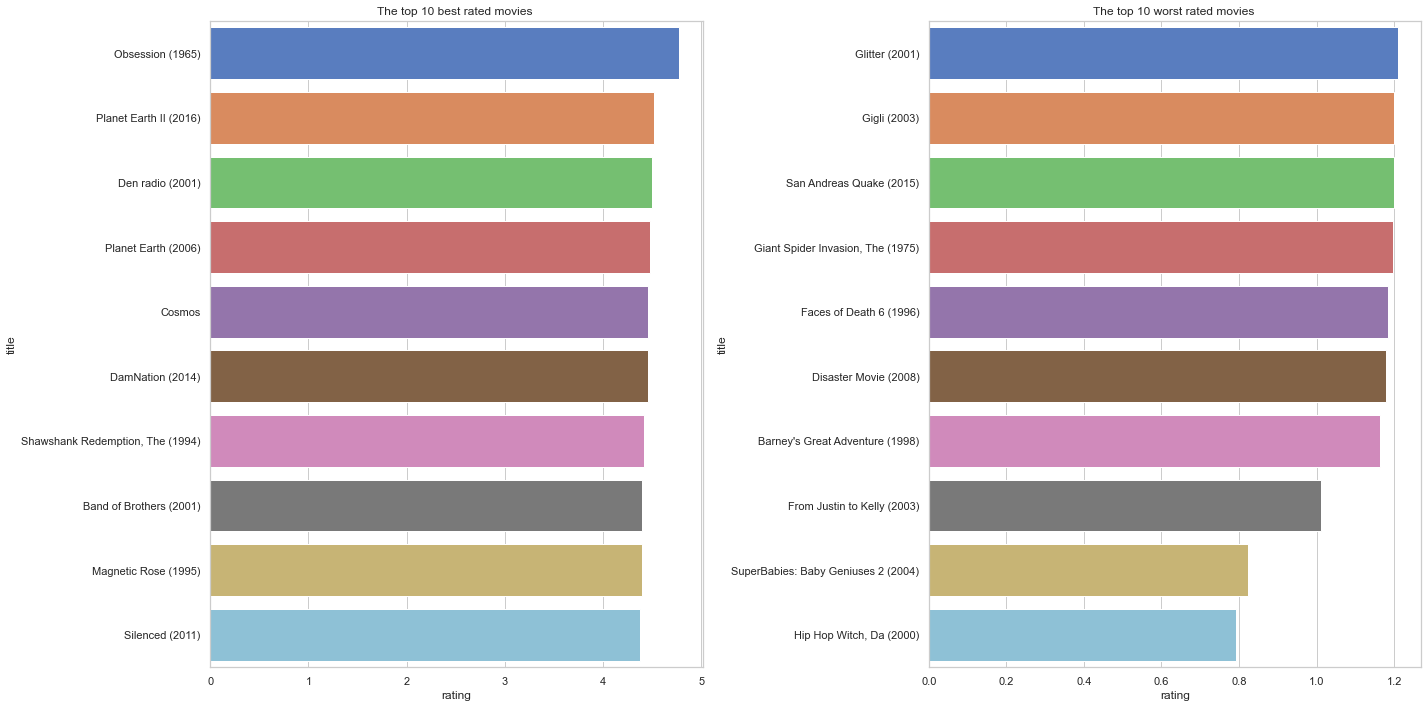

In [27]:
fig, ax  = plt.subplots(1,2,figsize=(20,10)) # Initialize a figure 

sns.barplot(ax=ax[0], x='rating',y = 'title', data=train3.head(10)) # Create a bar plot of the top 10 movies
ax[0].set_title('The top 10 best rated movies ') # Set title of the bar plot 

sns.barplot(ax=ax[1],x = 'rating',y = 'title', data = train3.tail(10)) # Create a bar plot of the top 10 worst rated movies
ax[1].set_title('The top 10 worst rated movies ') # Set title of the bar plot 

fig.tight_layout() # Set layout of the bar subplots 
plt.show() # show the plots 

The best rated movies have generally an average rating of 4.7 with the best movie as *Obsession* and above whereas the worst rated movies generally have lower rating of 1.2 and below with the worst movie being *Hip Hop Witch*. The reason behind why these movie have these rating will be explained in the next sections.

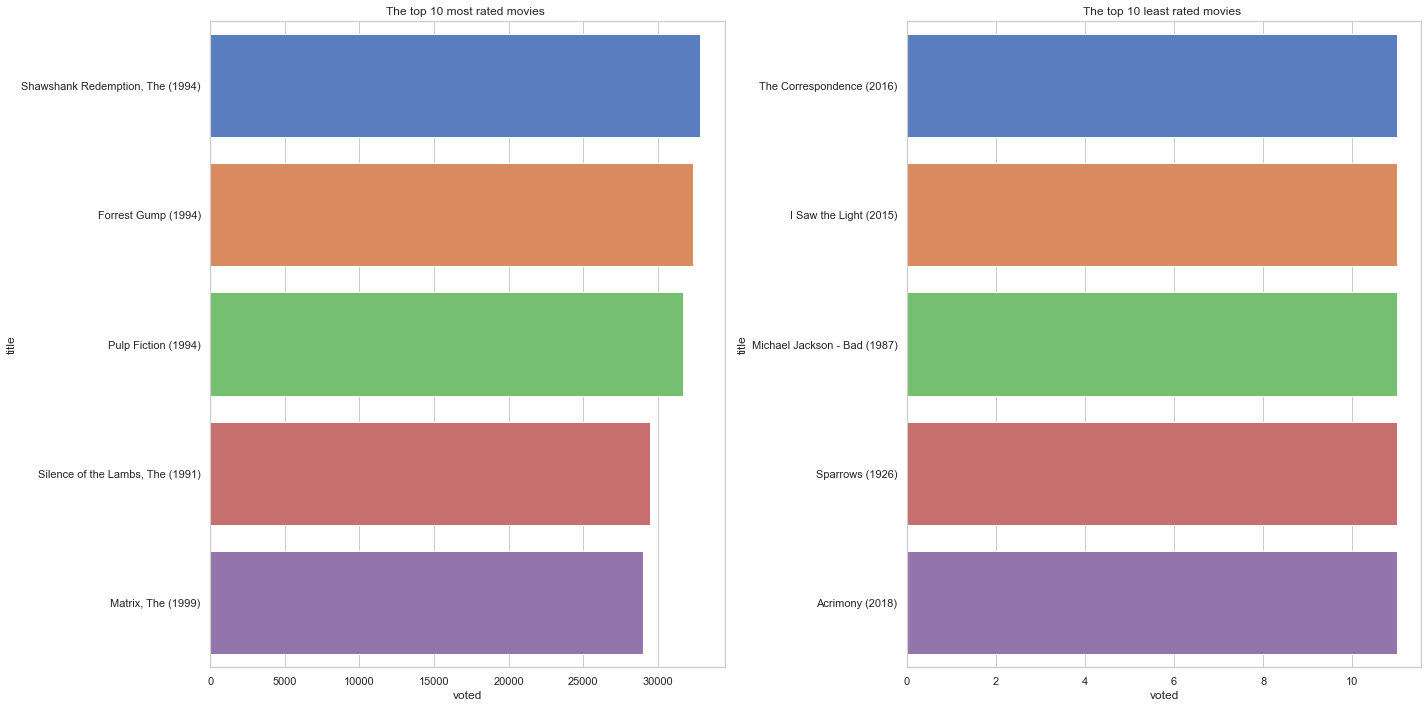

In [28]:
# Plot the most rated movies

# Create a dataframe to visualize the most rated movies and least rated movies
train4 = train3.sort_values('voted',ascending=False)

fig, ax  = plt.subplots(1,2,figsize=(20,10)) # Initialize a figure 

sns.barplot(ax=ax[0], x='voted',y = 'title', data=train4.head()) # Create a bar plot of the top 10 movies
ax[0].set_title('The top 10 most rated movies ') # Set title of the bar plot 

sns.barplot(ax=ax[1],x = 'voted',y = 'title', data = train4.tail()) # Create a bar plot of the top 10 worst rated movies
ax[1].set_title('The top 10 least rated movies ') # Set title of the bar plot 

fig.tight_layout() # Set layout of the bar subplots 
plt.show() # show the plots 


There is some correlation between the best rated movies and most voted for movies as movies such as *Shawshank Redemption* appeared both times which is not observed in the least voted movies and in the lowest rated for movies.
From the above plots, the relationship between rating and number of voted per movie is not very clear which will be adressed in the next section.
 
**Correlation**

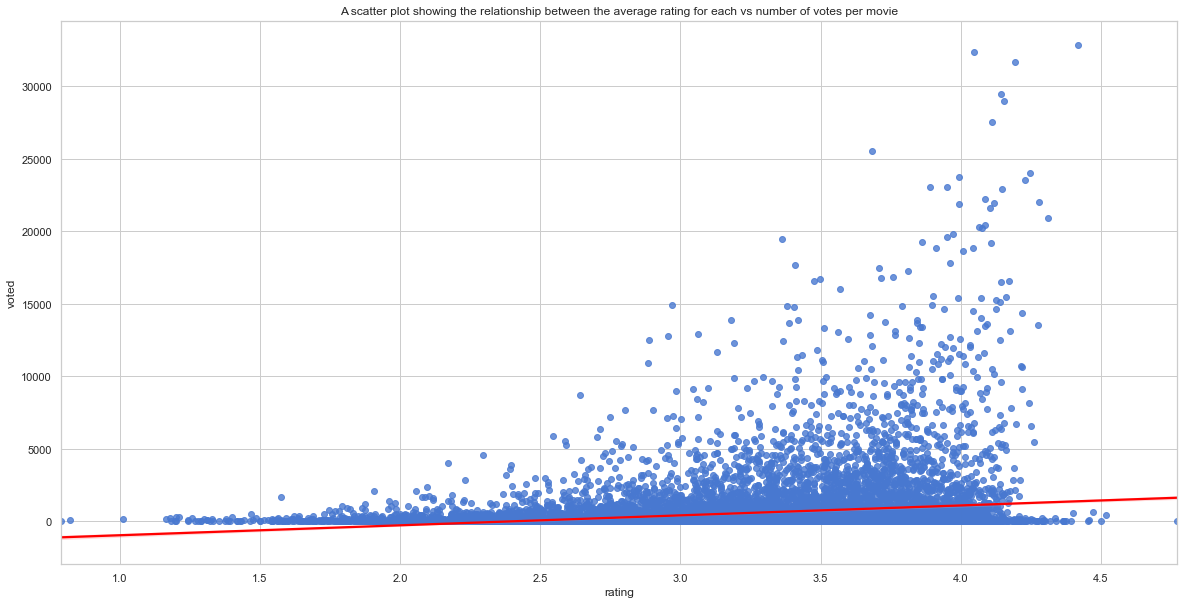

In [29]:
# Check for correlation between rating and number of the times have the user rated a movie

#Instantiate the figures
fig,ax = plt.subplots(figsize =(20,10))

# Create a scatter plot to visualise 
sns.regplot(data = train3, x = "rating", y = "voted",line_kws={"color": "red"})
ax.set_title("A scatter plot showing the relationship between the average rating for each vs number of votes per movie")
# Show the scatterplot
plt.show()

The more the users rated for a movie, the average rating of the movie seems to increase, similarly for movies that have the least movies which have a lower rating. The scatter plot indicates there is not linear correllation between the number of times a movie by the users has been watched compared to the how it is rated.

#### 7.3 Years analysis

In [30]:
movies = movies_df.copy() # Create a new copy of the Movies dataframe

train3['genres'] = train3.genres.str.split('|')
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
train3['year'] = train3.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
train3['year'] = train3.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
train3['title'] = train3.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
train3['title'] = train3['title'].apply(lambda x: x.strip())

train3.head() # Show the first 5 observations

,movieId,title,genres,rating,voted,year
18499,174551,Obsession,[Comedy],4.772727,11,1965
5148,171011,Planet Earth II,[Documentary],4.517084,439,2016
1152,171705,Den radio,[(no genres listed)],4.500000,13,2001
2660,159817,Planet Earth,[Documentary],4.473294,674,2006
9966,171495,Cosmos,[(no genres listed)],4.456897,116,NaN


In [31]:
train3.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16655 entries, 18499 to 28275
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  16655 non-null  int64  
 1   title    16655 non-null  object 
 2   genres   16655 non-null  object 
 3   rating   16655 non-null  float64
 4   voted    16655 non-null  int64  
 5   year     16627 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 910.8+ KB


In [32]:
train3.isnull().sum()

movieId     0
title       0
genres      0
rating      0
voted       0
year       28
dtype: int64

After extracting the release years , the year feature as observed from above is in the wrong in the wrong datatype and cosists of null values. 

In [33]:
train3['year'] = pd.to_numeric(train3['year'], errors='coerce')  # Change the year feature to a numeric feature 
train3 = train3.dropna(subset=['year']) # Drop all the rows that have null entries in the years 
train3['year'] = train3['year'].astype(int) # Change the datatype of the year into int
train3.info() # Show the metadata of the movies dataframe 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16627 entries, 18499 to 28275
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  16627 non-null  int64  
 1   title    16627 non-null  object 
 2   genres   16627 non-null  object 
 3   rating   16627 non-null  float64
 4   voted    16627 non-null  int64  
 5   year     16627 non-null  int32  
dtypes: float64(1), int32(1), int64(2), object(2)
memory usage: 844.3+ KB


In [34]:
train3.isnull().sum()

movieId    0
title      0
genres     0
rating     0
voted      0
year       0
dtype: int64

The year feature that was generated is in the right datatype and we can now use the year feature analysis.

In [35]:
# Sort the DataFrame by the years 
train3 = train3.sort_values('year',ascending=True).reset_index()

# Show first 5 observations from DataFrame
train3.head()

,index,movieId,title,genres,rating,voted,year
0,13585,120869,Employees Leaving the Lumière Factory,[Documentary],3.125000,12,1895
1,20625,113048,Tables Turned on the Gardener,[Comedy],2.970588,17,1895
2,11595,167502,Demolition of a Wall,[Documentary],2.909091,11,1896
3,25490,98981,"Arrival of a Train, The",[Documentary],3.266667,30,1896
4,12823,82337,Four Heads Are Better Than One (Un homme de tête),[Fantasy],3.593750,16,1898


In [36]:

def get_Decade_df():
    """
    """
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    count5 = 0
    count6 = 0
    count7 = 0
    count8 = 0
    count9 = 0
    count10 = 0
    count11 = 0
    counts = []
    # Create a for loop access every row we can divide the data accordingly.
    for i in range(len(train3)) :
        if (train3.loc[i,'year'] >= 1800 and train3.loc[i,'year'] < 1900):
            count1 = count1 + 1
        elif (train3.loc[i,'year'] >= 1900 and train3.loc[i,'year'] < 1920):
            count2 = count2 +1
        elif (train3.loc[i,'year'] >= 1920 and train3.loc[i,'year'] < 1940):
            count3 = count3 + 1
        elif (train3.loc[i,'year'] >= 1940 and train3.loc[i,'year'] < 1960):
            count4 = count4 + 1
        elif (train3.loc[i,'year'] >= 1960 and train3.loc[i,'year'] < 1970):
            count5 = count5 + 1
        elif (train3.loc[i,'year'] >= 1970 and train3.loc[i,'year'] < 1980):
            count6 = count6 + 1
        elif (train3.loc[i,'year'] >= 1980 and train3.loc[i,'year'] < 1990):
            count7 = count7 + 1
        elif (train3.loc[i,'year'] >= 1990 and train3.loc[i,'year'] < 2000):
            count8 = count8 + 1
        elif (train3.loc[i,'year'] >= 2000 and train3.loc[i,'year'] < 2010):
            count9 = count9 + 1  
        else:
            count10 = count10 + 1
#counts.extend([count1,count11])
    counts.extend([count1,count2,count3,count4,count5,count6,count7,count8,count9,count10])
    return counts

counts = get_Decade_df()

In [41]:
years  = [     '1800 - 1899',
               '1900 - 1919',
               '1920 - 1939',
               '1940 - 1959',
               '1960 - 1969',
               '1970 - 1979',
               '1980 - 1989',
               '1990 - 1999',
               '2000 - 2009',
               '2010 - till date']


counts_dict = {'era':years,
                'count':counts}
counts_df = pd.DataFrame(counts_dict)
counts_df 

,era,count
0,1800 - 1899,5
1,1900 - 1919,18
2,1920 - 1939,377
3,1940 - 1959,975
4,1960 - 1969,796
5,1970 - 1979,1003
6,1980 - 1989,1806
7,1990 - 1999,3011
8,2000 - 2009,4422
9,2010 - till date,4214


Since we obtained the correct dataset to see the trend between the decades of the movie ratings and the genres.

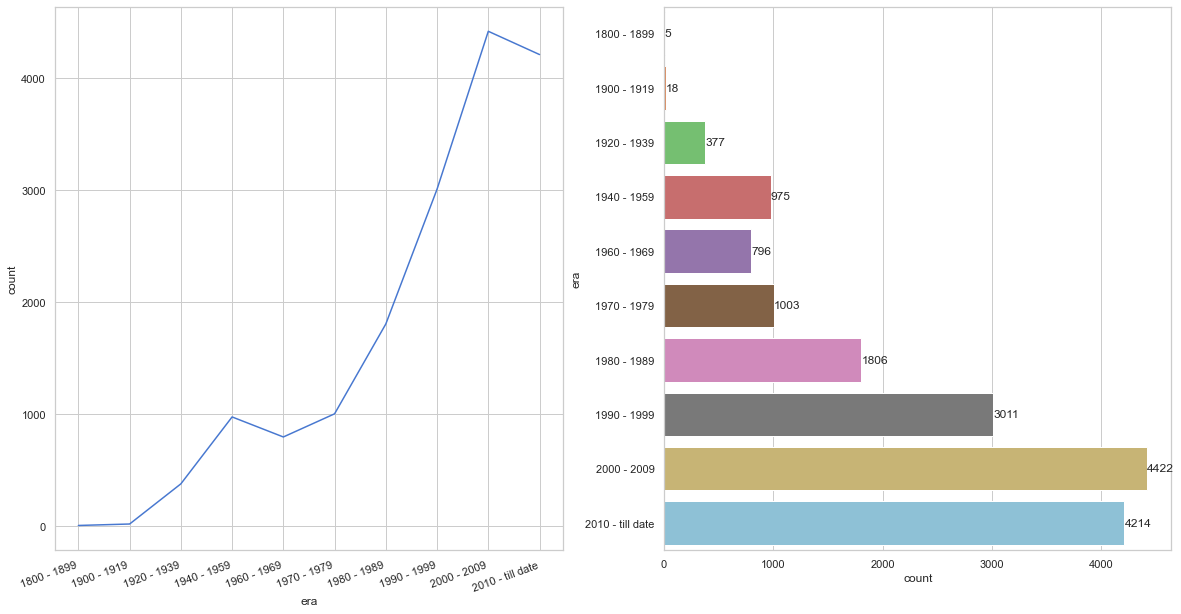

In [42]:
# Plotting the graph
fig, ax = plt.subplots(1,2,figsize=(20, 10)) # Initialize the plot with set figure size

# Create a lineplot to visualise the trend per 10 year period
sns.lineplot(ax=ax[0], x='era',y = 'count',data=counts_df)

# Fix x tick labels for readability  
ax[0].set_xticklabels(years,rotation = 20, ha="right")

# Create a barplot to visualise the how many movies were released per 10 year period 
sns.barplot(ax=ax[1], y = 'era',x = 'count', data = counts_df)
# Labeling the bars on the bar plot
for container in ax[1].containers:
    ax[1].bar_label(container)

# Show the barplot
plt.show()

From both plots, it is observed that more movies have been released as we progressed with in 20th century with biggest increase from the 1970s to the 1990s. This could be because the increas in technological advancements and more people having access to the entertainment. The early 2000s is when the most movies were released.

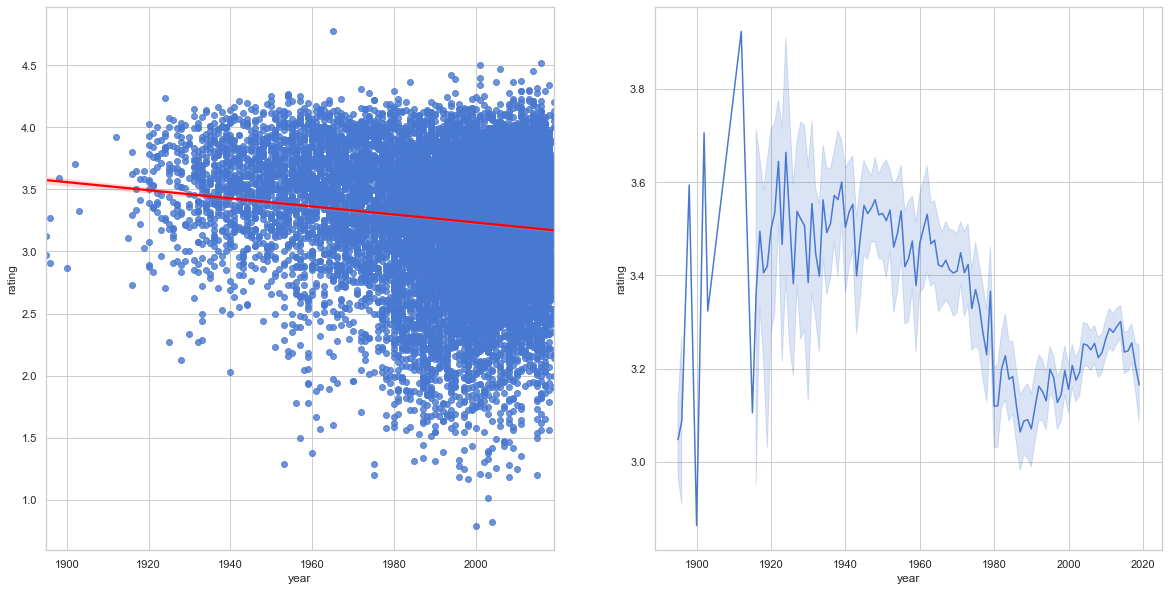

In [43]:
# Check for correlation between rating and release year between the movies
# Create new DataFrame to visualise
train5 = train3.sort_values('rating',ascending=False).reset_index()

fig, ax = plt.subplots(1,2,figsize=(20, 10)) # Initialize the plot with set figure size

# Create a scatter plot to visualise if there is correlation
sns.regplot(ax=ax[0], x='year',y = 'rating',data=train5,line_kws={"color": "red"}) 

# Create a line plot to visualise 
sns.lineplot(ax=ax[1],data = train5, x = "year", y = "rating")
# Labeling the bars on the bar plot
for container in ax[1].containers:
    ax[1].bar_label(container)


# Show the scatterplot
plt.show()

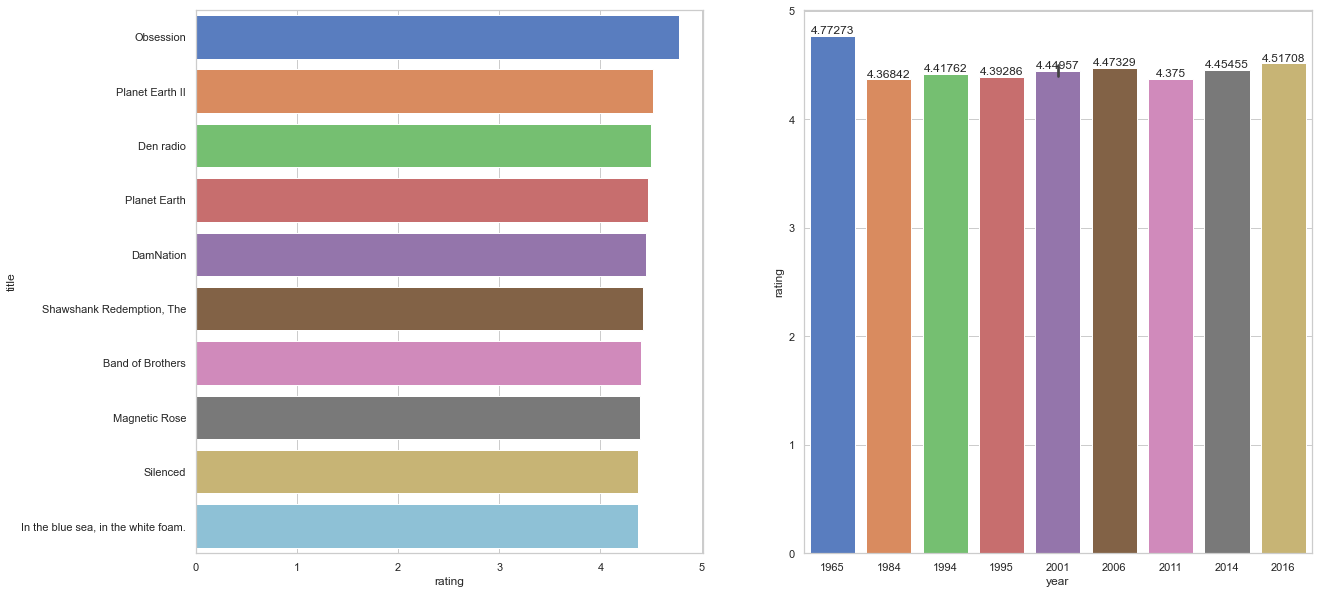

In [44]:
# Plotting the graph
fig, ax = plt.subplots(1,2,figsize=(20, 10)) # Initialize the plot with set figure size

# Create a lineplot to visualise the trend per 10 year period
sns.barplot(ax=ax[0], x='rating',y = 'title',data=train5.head(10))

# Create a barplot to visualise the how many movies were released per 10 year period 
sns.barplot(ax=ax[1], y = 'rating',x = 'year', data = train5.head(10))
# Labeling the bars on the bar plot
for container in ax[1].containers:
    ax[1].bar_label(container)



# Show the barplot
plt.show()

**7.4 Genres analysis**

#### Lets create a dataframe of the different movie genres.

In [45]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(movies_df[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


Let us take a look at a world cloud of the different genres.

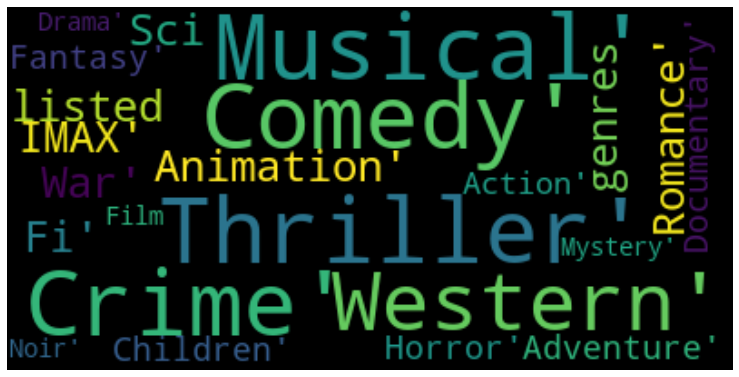

In [46]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
gen = movies_genres['genres'].explode()
text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

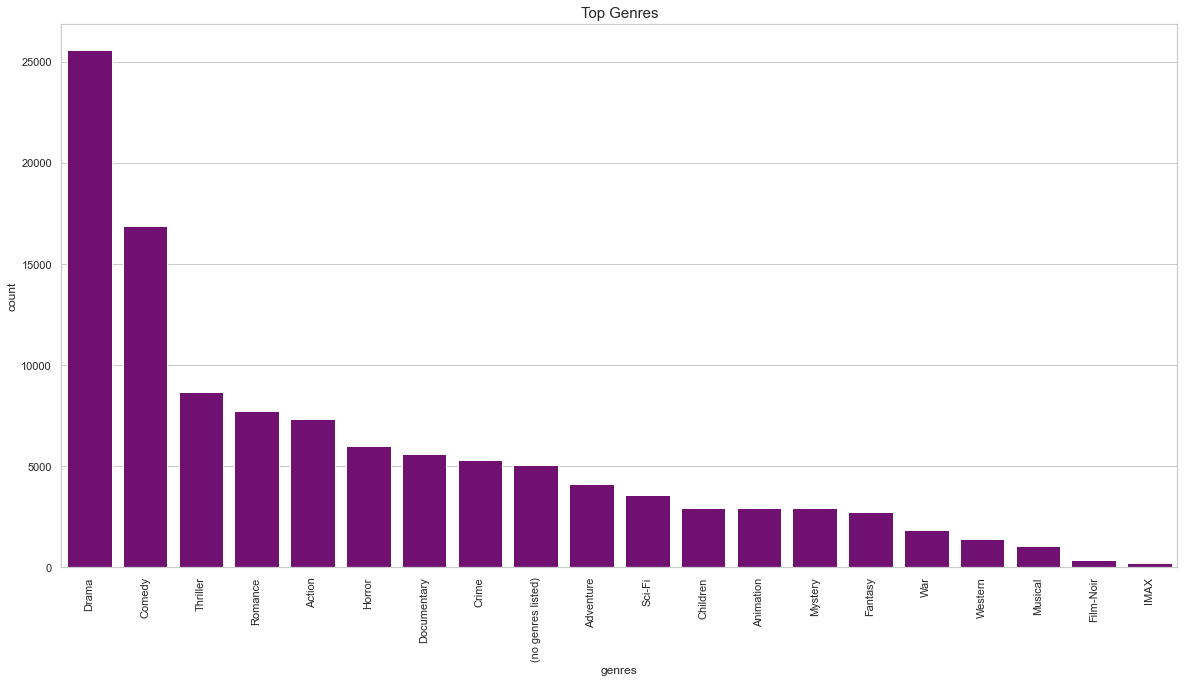

In [47]:
# Ploting top genres in the Dataset
plt.figure(figsize=(20, 10))
gen = movies_genres['genres'].explode()
ax=sns.countplot(x=gen, order=gen.value_counts().index[:30],color='purple')
ax.set_title('Top Genres', fontsize=15)
plt.xticks(rotation =90)
plt.style.use("dark_background")
plt.show()

Drama and Comedy are the most popular genres, followed by Thriller and Romance. We need to keep in mind that the movies could have multiple genres.

## 8. Recommendation System: Content Based Filtering

Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.

Content-based filtering makes recommendations by using keywords and attributes assigned to objects in a database (e.g., items in an online marketplace) and matching them to a user profile creating some form of feature matrix. The user profile is created based on data derived from a user’s actions, such as purchases, ratings (likes and dislikes), downloads, items searched for on a website and/or placed in a cart, and clicks on product links.
An example of a feature matrix:

![Matrix](https://developers.google.com/machine-learning/recommendation/images/Matrix1.svg)

Crelies on assigning attributes to database objects so the algorithm knows something about each object. These attributes depend primarily on the products, services, or content you’re recommending.

Assigning attributes can be a monumental undertaking. Many companies resort to using subject-matter expert teams to assign attributes to each item manually.

This method relies heavily on the similarities between features and relies on the feature matrix to compute the similarities between each features. The similarities are obtained by finding the distance using the cosine distance metric.

Cosine distance metric is calculated using the dot product 2 vectors over their norms. It is defined to equal the cosine of the angle between them, which is also the same as the inner product of the same vectors normalized to both have length 1.
![cosine](https://wikimedia.org/api/rest_v1/media/math/render/svg/1d94e5903f7936d3c131e040ef2c51b473dd071d)

As an angle becomes smaller  (approaching $0^o$) the value of its cosine increases. Conversely, as the angle increases the cosine value decreases. It turns out that this behavior makes the cosine of the angle between two p-dimensional vectors desirable as a similarity metric which can easily be computed. 

The data must be transformed into a feature matrix so that the similarities occurred.

**Preprocessing**

The EDA served as a guide on how to preprocess the data and extract the essential feature which is summarized in the function.

In [48]:
def data_preprocessing(subset_size):
    """Prepare data for use within Content filtering algorithm.

    Parameters
    ----------
    subset_size : int
        Number of movies to use within the algorithm.

    Returns
    -------
    Pandas Dataframe
        Subset of movies selected for content-based filtering.

    """
    movies = movies_df.copy()
    # Split the genres feature so that each genres will be in a list format 
    movies['genres'] = movies.genres.str.split('|')

    #Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
    moviesWithGenres_df = movies.copy()

    #For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
    for index, row in movies.iterrows():
        for genre in row['genres']:
            moviesWithGenres_df.at[index, genre] = 1
    #Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
    moviesWithGenres_df = moviesWithGenres_df.fillna(0)
    moviesWithGenres_df.drop(['genres'],axis =1, inplace = True)
    # Slice the data
    movie_subset = moviesWithGenres_df[:subset_size]

    return movie_subset

Now that the data has been processed, it will be now available to run the model which is based of on Nearest neighbors.

**Nearest Neighbors**

Nearest Neighbors from the scikit-learn has both features unsupervised and supervised learning algorithms. Unsupervised nearest neighbors is the foundation of many other learning methods, notably manifold learning and spectral clustering.

NearestNeighbors implements unsupervised nearest neighbors learning. It acts as a uniform interface to three different nearest neighbors algorithms: BallTree, KDTree, and a brute-force algorithm based on distance metrics for an example, cosine distance metric. The choice of neighbors search algorithm is controlled through the keyword 'algorithm', which must be one of ['auto', 'ball_tree', 'kd_tree', 'brute']. 

For the recommender system the Brute algorithm was chosen.

The Brute algorithm is the most naive neighbor search implementation involves the brute-force computation of distances between all pairs of points in the dataset: for  samples in  dimensions, this approach scales as time complexity is quadratic as it in data size.




In [49]:
def content_model(movie_list,top_n=10):
    """Performs Content filtering based upon a list of movies supplied
       by the app user.

    Parameters
    ----------
    movie_list : list (str)
        Favorite movies chosen by the app user.
    top_n : type
        Number of top recommendations to return to the user.

    Returns
    -------
    list (str)
        Titles of the top-n movie recommendations to the user.

    """
    # Initializing the empty list of recommended movies
    recommended_movies = []
    # Preprocess the data 
    data = data_preprocessing(27000)

    # Create a new DataFrame
    data2 = data.copy()

    # Change the index of the DataFrame
    data2 = data2.set_index('title')

    # Delete the columns the unneccesary columns 
    data.drop(['title'],axis = 1,inplace=True)
    
    # Generating the count matrix for each genres
    data = data.set_index('movieId')

    # Instantiating the model and fitting the model to the count matrix
    nn = NearestNeighbors(algorithm='brute',metric='cosine',n_neighbors=10)
    nn.fit(data)

    # Create an Empty list for the movieids
    movieids = []

    # Getting the movieids
    ind1 = data2.loc[movie_list[0],'movieId']
    ind2 = data2.loc[movie_list[1],'movieId']
    ind3 = data2.loc[movie_list[2],'movieId']

    # Adding the movieids to the list
    movieids.extend([ind1,ind2,ind3])
    # Setting a list of indexes
    index_list = []

    # Getting the suggestions in form of indexes
    for i in range(len(movieids)):
        distances,suggestions=nn.kneighbors(data.loc[movieids[i],:].values.reshape(1,-1),n_neighbors=15)

        for j in range(15):
            index_list.append(suggestions[0,j])

    # Creating an empty list to store the movie ids 
    movieids2 = []
    
    # Create a for loop get the titles of the movies
    for i in range(len(index_list)):
        id = data.index.values[index_list[i]]
        movieids2.append(id)

    # Create a list to store all the titles
    title_list = []

    # Create a new dataframe to get the titles of the movies and change the index to movieId 
    data3 = data_preprocessing(27000)
    data3 = data3.set_index('movieId')

    for i in range(len(movieids2)):
        title = data3.loc[movieids2[i],'title']
        if(title not in movie_list):
            title_list.append(title)

    # recommended movies 
    recommended_movies.extend(random.sample(title_list,k = top_n))
    return recommended_movies

**Demonstration**

In [51]:
# Declare a movie list 
movielist = ["Toy Story (1995)","Jumanji (1995)","Grumpier Old Men (1995)"]

# Run the recommendation
recommendation = content_model(movielist,10)

print(recommendation)

['Five Children and It (2004)', 'Shrek the Third (2007)', "Slugger's Wife, The (1985)", 'Indian in the Cupboard, The (1995)', 'Percy Jackson: Sea of Monsters (2013)', 'DuckTales: The Movie - Treasure of the Lost Lamp (1990)', 'Antz (1998)', 'Santa Claus: The Movie (1985)', 'Toy Story 2 (1999)', 'Escape to Witch Mountain (1975)']


These are the movie recommendations on user might get if those are their favourite 3 movies 

## 9. Dimensionality Reduction

The problems with increasing or high levels of dimensionality of our dataframes are as follows:

- More storage space required for the data;
- More computation time required to work with the data; and
- More features mean more chance of feature correlation, and hence feature redundancy.

For the reasons above, lets apply Principle Component Analysis (PCA).

**Principal Component Analysis**
The premise of PCA is that data in some higher number of dimensions can be mapped to some lower number of dimensions, whilst retaining the maximum amount of variance in the lower dimension. Lets apply the following steps;
1. Perform feature scaling on our data; 
2. Construct the covariance matrix of the data;
3. Compute the eigenvectors of this matrix; and Eigenvectors corresponding to the largest eigenvalues are used to reconstruct a maximal fraction of variance of the original data.

In [140]:
# Scaling the movies_df
# declare the features to be all columns from our movies_df
features = [col for col in train_df.columns]

# create scaler object
scaler = StandardScaler()

# define scaled data frame variable
scaled_df = pd.read_csv('train.csv')
scaled_df[features] = preprocessing.scale(scaled_df[features])

Text(0, 0.5, 'Cumulative explained variance')

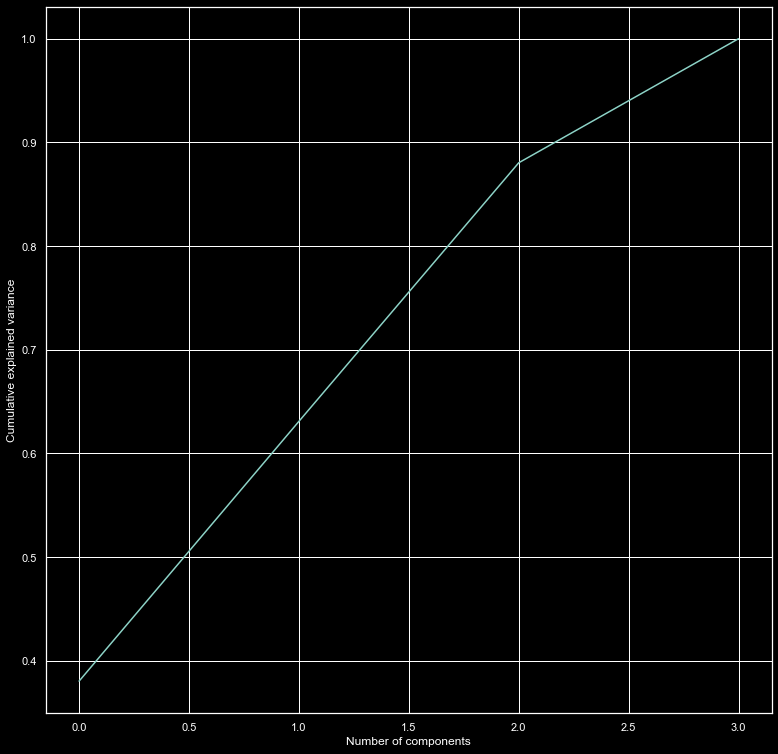

In [141]:
# define PCA object
pca = PCA()

# fit the PCA model to our data and apply the dimensionality reduction 
prin_comp = pca.fit_transform(scaled_df[features])

# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = prin_comp)



# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [142]:
pca_85 = PCA(.85)
pca_85.fit_transform(scaled_df[features])
print(round(pca_85.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_85.n_components_,
      "components.")

88.0 % of variance explained by 3 components.


In [143]:
pca.explained_variance_ratio_[:3]

array([0.3802045 , 0.25060905, 0.24947369])

In this instance, the first component explains 38%, with the 2nd following behind at 25% and the 3rd at 25% as well. Together, these components explain 88% of the data.

**Putting Our Dimensionality Reduction to Use**

Lets build a predictive regressor model.

We will use the feature named `Rating` as the response variable (the one that we will try to predict). This feature was used in our initial PCA, so we will have to make some changes to the dataset to ensure it is not included this time.

PCA requires features to be scaled, as we mentioned above. But we don't need to scale the response variable which we will use for prediction, as it is not used in PCA. This is good, because leaving the response as is means any predicted values and associated errors are easier to interpret. 

In [144]:
# exclude non-features from data
reg_data = scaled_df[features]

# set aside response variable (Unscaled!)
reg_response = train_df["rating"]

# drop response variable
reg_data = reg_data.drop(['rating'], 1)

Now, let's split the dataset up into train and test using with a ration of 80 percent training data and 20 percent testing data.

In [145]:
X_train, X_test, y_train, y_test = train_test_split(reg_data, reg_response, test_size=0.2)

Next, we apply PCA to the training set with the number of components set to 3.

In [146]:
# create PCA object with n_components set to 2
pca_reg = PCA(n_components=2)

# fit the PCA model to our data and apply the dimensionality reduction 
X_train = pca_reg.fit_transform(X_train)

# confirm the number of components
pca_reg.n_components_

2

In [147]:
pca_reg.explained_variance_ratio_.sum()

0.8403029546758694

Fantastic, 84 percent of the variance is captured with these 2 components. Let's continue by applying the same reduction transformation to the test set and make use of a random forest regression model for our predictions.

## 10. Collaborative Filtering
### What is Collaborative Filtering?

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users.
It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions. We shall be applying collaborative based filtering on the testing set and make our submission to the Kaggle competition with it.

Let us apply a SVD (singular value decompisition) to the dataset.

### 10.1 Singular Value Decomposition

Singular value decomposition (SVD) is a matrix factorization method that generalizes the eigendecomposition of a square matrix (n x n) to any matrix (n x m)

SVD is similar to Principal Component Analysis (PCA), but more general. PCA assumes that input square matrix, SVD doesn’t have this assumption. General formula of SVD is: M=UΣVᵗ

- M-is original matrix we want to decompose

- U-is left singular matrix (columns are left singular vectors). U columns contain eigenvectors of matrix MMᵗ

- Σ-is a diagonal matrix containing singular (eigen)values

- V-is right singular matrix (columns are right singular vectors). V columns contain eigenvectors of matrix MᵗM

We shall use the surprise package, which contains various algorithms specifically for collabaritive based filtering - using the columns of UserId, ItemId and Item rating.

In [148]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate


# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k')

# We'll use the SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results for smaller movie dataset
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9331  0.9399  0.9309  0.9368  0.9403  0.9362  0.0037  
MAE (testset)     0.7344  0.7393  0.7345  0.7371  0.7422  0.7375  0.0030  
Fit time          4.31    4.42    4.50    4.34    4.56    4.43    0.10    
Test time         0.15    0.13    0.13    0.12    0.15    0.14    0.01    


{'test_rmse': array([0.9330856 , 0.93987112, 0.93089259, 0.93679653, 0.94027984]),
 'test_mae': array([0.73443608, 0.73931706, 0.73452809, 0.73711155, 0.74223914]),
 'fit_time': (4.3105854988098145,
  4.415578603744507,
  4.501537322998047,
  4.33860182762146,
  4.563517332077026),
 'test_time': (0.14964699745178223,
  0.1319575309753418,
  0.12897658348083496,
  0.11796164512634277,
  0.14995145797729492)}

The above example is with a smaller dataset than ours, but the package incorporates large amounts of data during the training phase, ideal for our 10 million rows.
We also require a Reader object, but only the rating_scale parameter must be specified. The dataframe must have three columns, corresponding to the user (raw) ids, the item (raw) ids, and the ratings in this order (which we will specify below). Each row thus corresponds to a given rating.



In [149]:
train_df = pd.read_csv('train.csv')

In [150]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

#our training data
df = pd.DataFrame(train_df)
del df['timestamp']


# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

With our dataset prepared, we can proceed to training the model.

In [155]:
#packages we need
from surprise import accuracy
from surprise.model_selection import train_test_split

#allows us to train on the whole dataset
trainset = data.build_full_trainset()

#SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)

Before we determine the ratings of the users in the test set with our model trained on all the data, let us do a train/test split and see what the RMSE metric is.

In [152]:
# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the SVD algorithm.
algo2 = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo2.fit(trainset)
predictions = algo2.test(testset)

# Compute RMSE
accuracy.rmse(predictions)

RMSE: 0.8387


0.8387174330896905

## 11. Conclusion

We've demonstrated that we can continuously serve accurate content and as such our clients will remain loyal subscribers of our service.

With a majority of modern services and products now being offered predominately online, it can be hard to get to know your customers. 
Unlike running a local store where you get to know each person that comes in, online businesses can struggle to know exactly what their users are expecting.

**So, how can your business use this?**

To advances in machine learning, and deep learning specifically, it is now possible to get to know millions of customers completely online simply through their data.
By using a data model to filter through your users' favorite products and interests, it is easier than ever to make recommendations to them for what they would enjoy to use or buy.

Content-based solutions are used by a range of different businesses. They're probably the most commonly used method and one we have all encountered at some point.
Sites such as Amazon and the Google Play Store are just some of the many examples out there.

A content recommendation system will see what the user already has an interest in, and recommend similar products or items in this case movies.
 Think about the "What We Think You Might Like" sections on many e-commerce sites and you are on the right track.

Recommender systems became a useful feature due to the necessity to navigate in the sea of content. There is a lot of stuff available online,
and many users have a hard time not only finding something they want but even figuring out what it is that they want in the first place. So,
the recommender system is a delicate way of bringing users and relevant content together. 

In essence, anything can be recommended or suggested - shoes, clothes, places, films, applications, browser plugins, memes, music, blog posts, communities, even people or their specific skills, and so on.

All the recommendation system does is narrowing the selection of specific content to the one that is the most relevant to the particular user.

Serving accurate content, building strong relationships all while generating more data for our machine learning models to improve as our service continues. We are confident our solutions will provide our clients with the utmost standard of content tailored to them.

## 12. Submission

In [158]:
test_df = pd.read_csv('test.csv')

In [159]:
test_df.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


We need to prepare our test dataframe for the the surprise package, as it requires User, Item and a rating column.

In [160]:
test_df.loc[:, 'rating'] = 0
test_df.head()

,userId,movieId,rating
0,1,2011,0
1,1,4144,0
2,1,5767,0
3,1,6711,0
4,1,7318,0


In [161]:
#using load_from_df surprise function to load dataset for predictions
test_processed = Dataset.load_from_df(test_df[['userId','movieId','rating']], reader)

#Train test split, test size will be equal to 1.
NA, test = train_test_split(test_processed, test_size=1.0, shuffle = False, random_state = 42)

#Prediction 
predictions = algo.test(test)

In [162]:
#saving the predictions as a list to add as a column for our Kaggle submission
ratings = [i.est for i in predictions]
ratings

[3.2658751358684714,
 4.1618564353835215,
 3.7801052289547066,
 3.7101971187684173,
 3.0583170669735575,
 3.8550369949877603,
 4.111620548868895,
 3.589877586830689,
 3.6421909102400245,
 3.4083805338220365,
 3.169121002270965,
 3.1953623621728173,
 3.8797902583555204,
 4.6080305576892995,
 4.241355690125519,
 4.215727797113438,
 3.7811097841986947,
 2.630426713965236,
 3.4173570837492044,
 3.2644383738980682,
 4.100417924366338,
 3.6753375914221964,
 3.2860131839823237,
 3.1791979706834557,
 3.62753881056937,
 3.871449422737845,
 3.822603021179067,
 3.707121700977024,
 3.6905774958418793,
 3.5517744522172667,
 3.9465646775110055,
 3.5914943171997047,
 3.489807949209758,
 2.7325784391435586,
 2.5343816315581353,
 3.3285847737708263,
 3.4244514778288604,
 3.6031980222331463,
 5,
 3.4497443122278026,
 4.089583863590826,
 3.3904897887456293,
 3.922891592375336,
 3.765353517444904,
 4.083355389632934,
 3.645055551563177,
 4.254421652430533,
 4.594549549199854,
 3.9301724474057744,
 4.37209

We shall create a new dataframe with the ratings included and combining the userId and movieId into one column.

In [163]:
sample_df.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [164]:
test_df['Id'] = test_df['userId'].astype(str)  + '_'+ test_df['movieId'].astype(str) 

In [165]:
test_df

,userId,movieId,rating,Id
0,1,2011,0,1_2011
1,1,4144,0,1_4144
2,1,5767,0,1_5767
3,1,6711,0,1_6711
4,1,7318,0,1_7318
...,...,...,...,...
5000014,162541,4079,0,162541_4079
5000015,162541,4467,0,162541_4467
5000016,162541,4980,0,162541_4980
5000017,162541,5689,0,162541_5689


In [166]:
#change rating column
test_df['rating'] = ratings
del test_df['userId']
del test_df['movieId']

In [167]:
test_df

,rating,Id
0,3.265875,1_2011
1,4.161856,1_4144
2,3.780105,1_5767
3,3.710197,1_6711
4,3.058317,1_7318
...,...,...
5000014,3.166700,162541_4079
5000015,3.662362,162541_4467
5000016,2.427538,162541_4980
5000017,2.986006,162541_5689


Need to switch the above columns for the submission.

In [168]:
test_df['R'] = test_df['rating']
del test_df['rating']

In [169]:
test_df['rating'] = test_df['R']

In [170]:
del test_df['R']

In [171]:
test_df

,Id,rating
0,1_2011,3.265875
1,1_4144,4.161856
2,1_5767,3.780105
3,1_6711,3.710197
4,1_7318,3.058317
...,...,...
5000014,162541_4079,3.166700
5000015,162541_4467,3.662362
5000016,162541_4980,2.427538
5000017,162541_5689,2.986006


Perfect, now to save as a csv file for Kaggle submission. Important note 'index = False' must be specified else the Kaggle autograder won't accept our submission.

In [172]:
test_df.to_csv('Kaggle_submission.csv', index = False)